# Análise dos tweets do perfil @jairbolsonaro

#### following tutorials:
* https://www.kaggle.com/itratrahman/nlp-tutorial-using-python

* python liberaries: https://activewizards.com/blog/comparison-of-python-nlp-libraries/

Steps:
* Data imported and checked
* Feature engeneering
* Top words not working (take function from case made to ironhack)

* source: https://www.kaggle.com/itratrahman/nlp-tutorial-using-python

# Defining functions

In [1]:
def rename_cols(df):
    cols = df.columns
    cols = cols.str.replace(' ', '_').str.lower()
    df.columns = cols
    return(df)

In [2]:
import re
def remove_link(col):
    ''' a function for removing urls from a tweet'''
    url_pattern = r"""(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:\'\".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))"""
    col = re.sub(url_pattern, '', col)
    return(col)

In [98]:
from os import path
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def word_cloud_figure(col,
            max_words=None,
            background_color='white',
            stopwords=None):
    string_text = str(col)
    wordCloud = WordCloud(max_words=max_words,
                        repeat=False,
                        stopwords=stopwords,
                        background_color=background_color
                        ).generate(string_text)
    plt.figure(figsize=(10,7))
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis('off')
    return(plt.show())

In [136]:
from textblob import Word

def lemmatization(col):
    col = col.apply(lambda x: ' '.join(
        [Word(x).lemmatize() for x in x.split()]))
    return(col)

In [5]:
def serie_to_string(col):
    ''' tranform a Pandas Series into a string'''
    string = ''
    for i in col:
        string = string + (" ".join(i.split()))
    return(string)

In [275]:
import pandas as pd

# returns a boolean series after searched for a string pattern
def count_themes(col, df, pattern_df):
    # extrat list of lables
    subject_list = [i for i in pattern_df.iloc[:,0]]
    # extrat list of patterns
    pattern_list = [i for i in pattern_df.iloc[:,1]]
    pattern_extraction = []
    # interate through each pattern element
    for i in pattern_list:
        # for each pattern extract matched terms and returns a boolean
        pattern_extraction.append(df[col].str.extract((i)).notnull())
    # concat the list
    df_themes = pd.concat(pattern_extraction, axis=1)
    # rename new dataframe
    df_themes.columns = columns_list
    # concat the original with the new dataframe
    df_total = pd.concat([df, df_themes], axis=1)
    return(df_total, df_themes)

* https://www.kaggle.com/itratrahman/nlp-tutorial-using-python

In [3]:
# remove punctionation
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)    

In [4]:
def remove_sw(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

# Import and check data

In [33]:
import pandas as pd

In [51]:
# importing xlsx into a pandas dataframe
df = pd.read_excel('Jair_Bolsonaro.xlsx')

# selecting tweets from @jairbolsonaro account
df = df[df['Author name']=='Jair M. Bolsonaro']
df.head(1)

# Select columns
cols = ['id', 'Detail', 'Link', 'Update date', 'Publish date', 'Tags', 'Audience', 'Reach', 'Interactions']
df = df[cols]
df = rename_cols(df)

In [52]:
# check the dataset
print(df.shape)
df.head(1)

(1809, 9)


,id,detail,link,update_date,publish_date,tags,audience,reach,interactions
0,336912077,- Resumo de nossa ida a Pelotas/RS por ocasião...,https://twitter.com/jairbolsonaro/status/11612...,30/09/2019 09:17:00,13/08/2019 08:28:34,NaN,4856491,165120,41447


# Data cleaning

In [129]:
# stopwords variables
from nltk.corpus import stopwords
sw_pt = stopwords.words('portuguese') 
sw_en = stopwords.words('english')
sw_new = ['é', 'r', 'ser', 'via', 'sobre', 'ainda', '"', '“', 'após', 'tudo', 'cada', 'todo', '…rt', '1', 'outros', '”', 'sendo', 'vamos', 'anos', 'hoje']
from string import digits
sw_digits = [i for i in digits]
sw = sw_pt + sw_en + sw_new + sw_digits

In [130]:
# Remove link
df['text'] = df.detail.apply(remove_link)
df.text[0]

'- Resumo de nossa ida a Pelotas/RS por ocasião da entrega de trecho da BR 116.'

In [131]:
# Removing punctuations and stopwords
df['text'] = df.text.apply(remove_punctuation)
df['text'] = df.text.apply(remove_sw)
df.text[0:2]

0    resumo ida pelotasrs ocasião entrega trecho br...
1    parabéns atletas representaram brasil jogos pa...
Name: text, dtype: object

In [132]:
# clear stop words
from nltk.tokenize import word_tokenize
tweets_str = serie_to_string(df.text)

clean_text = [w for w in word_tokenize(tweets_str) 
              if w not in sw]

In [133]:
clean_text[0:5]

['resumo', 'ida', 'pelotasrs', 'ocasião', 'entrega']

# DataViz

In [134]:
# count most frequent words
from collections import Counter
Counter(clean_text).most_common(10)

[('brasil', 360),
 ('governo', 198),
 ('presidente', 123),
 ('todos', 122),
 ('país', 93),
 ('bolsonaro', 90),
 ('economia', 89),
 ('dia', 85),
 ('grande', 83),
 ('nacional', 73)]

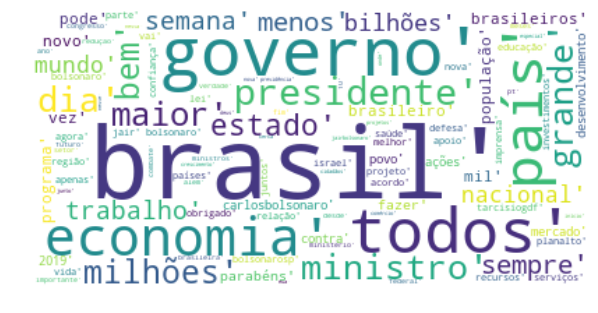

In [135]:
word_cloud_figure(clean_text,
              max_words=100)

# Ruled bases classification

In [261]:
from sys import path
path.append('/Users/liviaclarete/gdrive/code/functions/')

from GoogleSheet_read_returns_df import gsheet_returns_df
from GoogleSheet_writes_gsheet import write_df_gsheet
from NLP_count_themes_boolean import count_themes

In [266]:
# retrieve stringlines from a google spreadsheet
pattern_df = gsheet_returns_df('tematicas_bolsonaro', 'strings')

In [274]:
pattern_df.head()

,tematicas_bolsonaro,query,,
0,Segurança pública,(segurança|crime),,
1,Economia,(economia|trabalho|predivência|mercado|desenvo...,,
2,Congresso,(congresso),,
3,"Educação, ciência e tecnologia",(educação),,
4,Saúde,(saúde),,


In [284]:
df['text_lower'] = df.text.str.lower()

In [285]:
df_total, df_themes = count_themes('text_lower', df, pattern_df)

In [286]:
for i in df_themes.columns:
    print(df_themes[i].value_counts())

False    1727
True       82
Name: Segurança pública, dtype: int64
False    1412
True      397
Name: Economia, dtype: int64
False    1773
True       36
Name: Congresso, dtype: int64
False    1774
True       35
Name: Educação, ciência e tecnologia, dtype: int64
False    1775
True       34
Name: Saúde, dtype: int64
False    1711
True       98
Name: Infraestrutura, dtype: int64
False    1809
Name: Justiça, dtype: int64
False    1351
True      458
Name: Governo, dtype: int64
False    1785
True       24
Name: Nacionalismo, dtype: int64
False    1763
True       46
Name: Eleitorado, dtype: int64
False    1776
True       33
Name: Meio ambiente, dtype: int64
False    1809
Name: Imprensa, dtype: int64
False    1665
True      144
Name: Relações internacionais, dtype: int64
False    1728
True       81
Name: Valores, dtype: int64
False    1719
True       90
Name: Esquerda, dtype: int64
False    1786
True       23
Name: Exército, dtype: int64
False    1793
True       16
Name: Corrupção, dtype: int64


In [292]:
# calculate the total number of classified tweets
# returns a column summing the number of True's
df_themes['total'] = df_themes.sum(axis=1)

# transform the number into a boolean
df_themes['total'] = df_themes.total.apply(lambda x: x>0)

# sum the total number of True's in total column
label_tweets = round(df_themes.total.sum()/df_themes.total.shape[0]*100)

print(f'{label_tweets}% of tweets were classified. Still {100-label_tweets} to classify.')

58.0% of tweets were classified. Still 42.0 to classify.


In [314]:
# set an index in order to concat n and percentage
strings = pattern_df.copy()
strings.index = pattern_df['query']
strings.drop('query', axis=1, inplace=True)

In [323]:
# concat the datasets
df_pattern_counts = pd.concat([df_themes.sum(),
                               df_themes.sum()/df_themes.shape[0]],
                              axis=1, sort=True)

In [329]:
pattern_df.index = pattern_df.tematicas_bolsonaro

In [357]:
temas_total = pd.concat([pattern_df, df_pattern_counts], axis=1)
temas_total.drop('tematicas_bolsonaro', axis=1, inplace=True)
temas_total.reset_index(inplace=True)

/Users/liviaclarete/.pyenv/versions/dataAnalysis/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [369]:
write_df_gsheet('tematicas_bolsonaro', 'strings_count', temas_total['query'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

# Pre-processing

* __stemming operations__

In [599]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('portuguese')

def stemming(text):
    text = [stemmer.stem(word) for word in text.split()]
    return(' '.join(text))

In [600]:
df['text_stem'] = df.text.apply(stemming)

In [601]:
df.text_stem.head(3)

0       resum ida pelotasrs ocasiã entreg trech br 116
1    parabéns atlet represent brasil jog panamerica...
2    345 x 76 textobas med provisór liberdad econôm...
Name: text_stem, dtype: object

In [602]:
from nltk.stem.lancaster import LancasterStemmer
lst = LancasterStemmer()
words_stemm = [lst.stem(w) for w in word_tokenize(tweets_str)]

In [603]:
type(words_stemm)

list

Lemmatization
* https://www.kaggle.com/alvations/basic-nlp-with-nltk

* __tokenize and bigram__

In [605]:
from nltk.tokenize import word_tokenize, TweetTokenizer
from nltk.collocations import *

In [606]:
import nltk
words_bigam = nltk.collocations.BigramAssocMeasures()

words_finder = nltk.BigramCollocationFinder.from_words(clean_text)

* Bag of words
* TF-IDF
* Word2Vec
etc
* https://www.kaggle.com/shashanksai/text-preprocessing-using-python

Vectorization
* https://www.kaggle.com/ragnisah/text-data-cleaning-tweets-analysis

In [642]:
from sklearn.feature_extraction.text import CountVectorizer
countVectorizer = CountVectorizer(analyzer=df.text.to_list())

In [645]:
# countVector = countVectorizer.fit_transform(df.text.to_list())

Text classification
* https://www.kaggle.com/sanikamal/text-classification-with-python-and-keras
* https://github.com/costezki/awesome-nlprojects
* https://www.kaggle.com/getting-started/51445

# Feature extraction

* lenth of the text

In [213]:
def length(text):
    return(len(text))

In [216]:
df['length'] = df.detail.apply(length)

* Mentions

In [16]:
df['mentions'] = [re.findall('RT (@\w+)', i) for i in df.detail]
df['mentions'] = df.mentions.apply(clear_list)

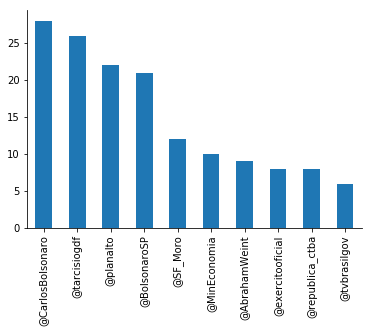

In [17]:
df.mentions.value_counts()[1:11].plot(kind='bar')
sns.despine();

* Hashtags

In [18]:
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import TweetTokenizer

In [19]:
def hashtags(col):
    pattern = r'#\w+'
    hashtag = regexp_tokenize(col, pattern)
    return(hashtag)

In [20]:
df['hashtag'] = df.detail.apply(hashtags)

In [21]:
df['hashtag']

0       []
1       []
2       []
3       []
4       []
        ..
1824    []
1825    []
1826    []
1827    []
1828    []
Name: hashtag, Length: 1809, dtype: object

* Emojis

In [22]:
def emojis(col):
    pattern = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
    emoji = regexp_tokenize(col, pattern)
    return(emoji)

In [23]:
df['emojis'] = df.detail.apply(emojis)

In [24]:
df

,id,detail,link,update_date,publish_date,tags,audience,reach,interactions,mentions,hashtag,emojis
0,336912077,- Resumo de nossa ida a Pelotas/RS por ocasião...,https://twitter.com/jairbolsonaro/status/11612...,30/09/2019 09:17:00,13/08/2019 08:28:34,NaN,4856491,165120,41447,,[],[]
1,337133609,- Parabéns aos nossos atletas que representara...,https://twitter.com/jairbolsonaro/status/11613...,30/09/2019 09:17:00,13/08/2019 16:47:07,NaN,4856491,165120,65648,,[],[]
2,337329849,"- Por 345 x 76, texto-base da nossa Medida Pr...",https://twitter.com/jairbolsonaro/status/11614...,30/09/2019 09:17:00,13/08/2019 23:49:04,NaN,4872196,165654,67824,,[],[]
3,337343559,Grande dia! :+1:,https://twitter.com/jairbolsonaro/status/11614...,30/09/2019 09:17:00,13/08/2019 23:41:53,NaN,4872196,165654,8614,,[],[]
4,337446779,RT @DamaresAlves: Tiraram dinheiro da construç...,https://twitter.com/jairbolsonaro/status/11615...,30/09/2019 09:17:00,13/08/2019 22:23:25,Bolsonaro,4872196,165654,0,@DamaresAlves,[],[]
5,337546713,- Recepção calorosa em Parnaíba/Piauí. :br:htt...,https://twitter.com/jairbolsonaro/status/11616...,30/09/2019 09:17:00,14/08/2019 11:31:07,NaN,4872196,165654,64296,,[],[]
6,337594081,"- Com o prefeito Mão Santa, de Parnaíba. Obrig...",https://twitter.com/jairbolsonaro/status/11616...,30/09/2019 09:17:00,14/08/2019 14:02:59,NaN,4872196,165654,39952,,[],[]
7,337798915,- Os preços começam a se aproximar dos valores...,https://twitter.com/jairbolsonaro/status/11617...,30/09/2019 09:17:00,14/08/2019 21:39:36,NaN,4872196,165654,39269,,[],[]
8,337798925,- Fernandez-Kirchner tiveram 47% dos votos na ...,https://twitter.com/jairbolsonaro/status/11617...,30/09/2019 09:17:00,14/08/2019 21:39:35,NaN,4872196,165654,63921,,[],[]
9,337818361,- :+1::br:https://twitter.com/tarcisiogdf/stat...,https://twitter.com/jairbolsonaro/status/11618...,30/09/2019 09:17:00,14/08/2019 21:48:24,NaN,4872196,165654,27451,,[],[]


# Retweets

In [25]:
# create column with RT or Tweets from author
df['rt'] = df.detail.str.startswith('RT')

In [26]:
# rename categories from 'rt' column
rt_dict = {False:'tweet', True:'retweet'}
df.rt = df.rt.map(rt_dict)

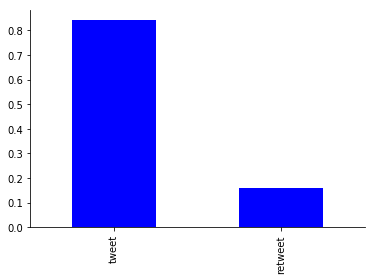

In [27]:
# plot proportion of tweets and rt's
df.rt.value_counts(normalize=True).plot(kind='bar', color='b');
sns.despine()

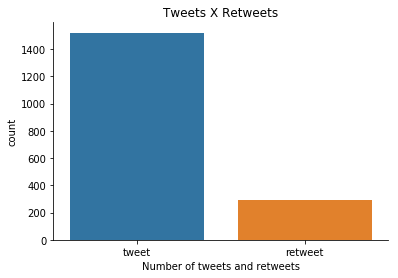

In [28]:
# plot number of tweets and rt's
sns.countplot(df.rt)
plt.title('Tweets X Retweets')
plt.xlabel('Number of tweets and retweets')
sns.despine()

In [29]:
# selecting retweets dataset
retweets = df[df.rt=='retweet']

In [30]:
# identify who Bolsonaro is retweeting
retweets['rt_author'] = sum([re.findall('RT (@\w+)', i) for i in df.detail], [])

/Users/liviaclarete/.pyenv/versions/dataAnalysis/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


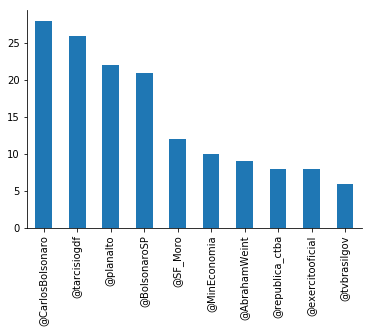

In [31]:
retweets.rt_author.value_counts()[:10].plot(kind='bar')
sns.despine();

# LDA

In [ ]:
import gensim
from gensim import corpora


# Creating a term dictionary of the text corpus
dictionary = corpora.Dictionary(tokenized_data)

# creating a Document Text Matrix with the dictionary
doc_term_matrix = [dictionary.doc2bow(i) for i in tokenized_data]


In [ ]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix,
                id2word=dictionary,
                num_topics=7, 
                random_state=100,
                chunksize=1000,
                passes=50)

In [ ]:
# Printing the topics
lda_model.print_topics()

In [ ]:
import pyLDAvis
import pyLDAvis.gensim

# Downalod dictionaries from spacy -- lemmatization
# !python -m spacy download en # one time run
# !python -m spacy download pt # one time run

import matplotlib.pyplot as plt
import seaborn as sns

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

# KMEANS

In [183]:
# importing tfidf vectorizer and kmeans function
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [184]:
# Creating a Tdidf table
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train.tweet.values)
%time

NameError: name 'train' is not defined

In [ ]:
# setting the kmeans function
true_k = 7
model = KMeans(n_clusters=true_k,
              init='k-means++',
              max_iter=100,
              n_init=3,
              verbose=True)

model.fit(X)
%time

In [185]:
# get the features and the centroids
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
%time

NameError: name 'model' is not defined

In [ ]:
for i in range(true_k):
    print("Cluster %d:" %i),
    for ind in order_centroids[i, :10]:
        print("%s" %terms[ind])
%time

In [ ]:
print("\n")
print("Prediction")
X = vectorizer.transform(['namorar ficar sexo relacionamento'])

In [ ]:
predicted = model.predict(X)
print(predicted)

In [ ]:
b = vectorizer.transform(list(train.tweet))

In [ ]:
b_predict = model.predict(b)

In [ ]:
pd.DataFrame(b_predict)[0].value_counts()